# <font color = Crimson size = 6> <b>Линейная регрессия</b> </font>

In [52]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

***
## <font color = DarkGreen size = 5> <b>Диаграмма рассеяния</b> </font>

**Диаграмма рассеяния** – это множество точек $(x_i;y_i)$ в декартовой системе координат, абсциссы $x_i$ которых соответствуют значениям признака-фактора $X$, а ординаты $y_i$ – соответствующим значениям признака-результата $Y$.

##### <font color = SlateBlue size = 3> Пример </font>

Имеются выборочные данные по 8ми студентам, где $X$ – количество прогулов за некоторый период времени, $Y$ – суммарная успеваемость за этот период.

In [2]:
df = pd.DataFrame({'X': [12,   9,   8, 14, 15, 11, 10, 15],
                   'Y': [42, 107, 100, 60, 78, 79, 90 ,54]})
df

,X,Y
0,12,42
1,9,107
2,8,100
3,14,60
4,15,78
5,11,79
6,10,90
7,15,54


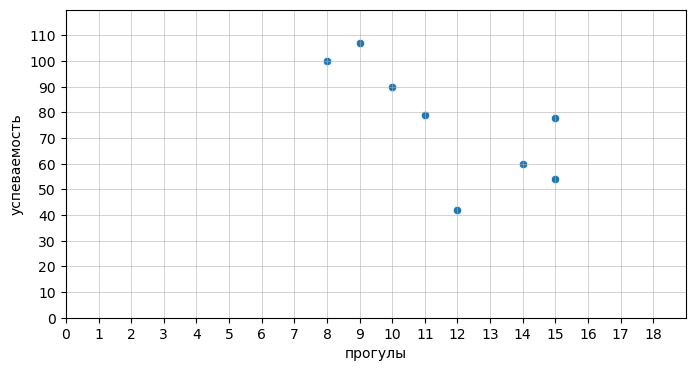

In [24]:
plt.figure(figsize=(8,4))

sns.scatterplot(x='X', y='Y', data=df)

plt.xlim([0,19])
plt.xticks(ticks=np.arange(0, 19))
plt.ylim([0,120])
plt.yticks(ticks=np.arange(0, 120, 10))
plt.xlabel('прогулы')
plt.ylabel('успеваемость')
plt.grid(linewidth=0.4);

***
## <font color = DarkGreen size = 5> <b>Уравнение линейной регрессии</b> </font>

***
### <font color = MediumBlue size = 4> <b>Метод наименьших квадратов</b> </font>

Оптимальная прямая $y = ax + b$, которая проходит максимально близко к эмпирическим точкам. Обычно её находят методом наименьших квадратов.

$\hat{y} = \beta_0 + \beta_1 x_i$

$\beta_0 = m_y - r \cfrac{\sigma_y}{\sigma_x} m_x$, \
$\beta_1 = r \cfrac{\sigma_y}{\sigma_x}$ – **коэффициент регрессии** $Y$ на $X$

In [32]:
X = df['X'].values
Y = df['Y'].values
n = X.shape[0]

In [33]:
Mx, My, SDx, SDy = X.mean(), Y.mean(), X.std(), Y.std()
r = np.corrcoef(X,Y)[0,1]

b1 = r * SDy / SDx
b0 = My - b1 * Mx
b0, b1

(147.3203883495146, -6.048543689320389)

***
### <font color = MediumBlue size = 4> <b>Матричный метод</b> </font>

Чтобы решить матричным методом уравнение вида $\hat{y} = \beta_0 + \beta_1 x_i$, нам нужно представить это уравнение в матричном виде.\
Матрица $X$ равна произведению матрицы $Y$ и матрицы $B$: \
$Y = X \cdot B$

$\begin{pmatrix} y_1 \\ y_2 \\ \ldots \\ y_n \\ \end{pmatrix}$ = 
$\begin{pmatrix} 1 & x_1 \\ 1 & x_2 \\ \ldots \\ 1 & x_n \\ \end{pmatrix}$
$\begin{pmatrix} \beta_0 \\ \beta_1 \\ \end{pmatrix}$

$B = (X^T \cdot X)^{-1} \cdot X^T \cdot Y$

Матричный метод мы также можем использовать и при многомерном анализе. Тогда у нас будет больше столбцов (признаков) в матрице $X$ и, соответственно, матрица $B$ даст больше коэффициентов.

Если по какой-то причине мы хотим построить модель без интерсепта, тогда просто не добавляем столбец единиц.

In [36]:
X = df['X'].values
X = np.hstack([np.ones((n,1)), X.reshape((-1,1))])

In [37]:
Y = df['Y'].values
Y = Y.reshape((-1,1))

In [39]:
B = np.linalg.inv(X.T @ X) @ (X.T @ Y)
B

array([[147.32038835],
       [ -6.04854369]])

***
### <font color = MediumBlue size = 4> <b>Метод градиентного спуска</b> </font>

Оптимальная прямая $y = a + bx$, которая проходит максимально близко к эмпирическим точкам.

Подберем параметры $a$ и $b$ так, чтобы сумма квадратов отклонений была минимальной. Так как каждое отклонение зависит от отыскиваемых параметров, то и сумма квадратов отклонений есть функция $F$ этих параметров:\
$\displaystyle F(a,b) = \sum_{i=1}^{n}{(Y_i-y_i)^2} = \sum_{i=1}^{n}{(a + b x_i -y_i)^2}$

Для отыскания минимума нужны частные производные: \
$\displaystyle \cfrac{\partial{F}}{\partial{a}} = 2\sum_{i=1}^{n}{(a + b x_i - y_i)x_i}$ \
$\displaystyle \cfrac{\partial{F}}{\partial{b}} = 2\sum_{i=1}^{n}{(a + b x_i - y_i)}$



In [40]:
# функция потерь
def mse(a, b, x, y, n):
    return np.sum((a + b*x - y)**2)

# частная производная функции потерь по a
def mse_pa(a, b, x, y, n):
    return 2 * np.sum((a + b*x) - y)

# частная производная функции потерь по b
def mse_pb(a, b, x, y, n):
    return 2 * np.sum(((a + b*x) - y)*x)

In [41]:
X = df['X'].values
Y = df['Y'].values

In [48]:
alpha = 1e-5
a = 0
b = 0
mse_min = mse(a,b,X,Y,n)

for i in range(2*10**6):
    a -= alpha * mse_pa(a,b,X,Y,n)
    b -= alpha * mse_pb(a,b,X,Y,n)
    if not i%(1*10**5):
        print(f'{i}: {a = } {b = } mse = {mse(a, b, X, Y, n)}')
    if mse(a,b,X,Y,n) > mse_min:
        print(f'Достигнут минимум {i_min}: a = {a_min} b = {b_min} mse = {mse_min}')
        break
    else:
        mse_min = mse(a,b,X,Y,n)
        i_min, a_min, b_min = i, a, b

0: a = 0.0122 b = 0.13709706400000002 mse = 48281.28441430877
100000: a = 74.9995314663167 b = -0.16602164745538592 mse = 3621.470641785071
200000: a = 111.70124260686227 b = -3.15131018056983 mse = 2209.554336601415
300000: a = 129.77740561791794 b = -4.621611168798081 mse = 1867.0636025618114
400000: a = 138.68019676983243 b = -5.34575725116323 mse = 1783.985092545101
500000: a = 143.06495974448737 b = -5.702410448572362 mse = 1763.8326091619897
600000: a = 145.2245236403238 b = -5.878067690003988 mse = 1758.944189925492
700000: a = 146.28814241451045 b = -5.964581610786184 mse = 1757.758398468552
800000: a = 146.81199118739949 b = -6.007191061032344 mse = 1757.4707591906324
900000: a = 147.0699948476535 b = -6.028176877347788 mse = 1757.400986083635
1000000: a = 147.19706565921268 b = -6.0385127179626386 mse = 1757.3840611125552
1100000: a = 147.25965000834384 b = -6.0436032800647235 mse = 1757.3799555959972
1200000: a = 147.29047377273318 b = -6.046110460997692 mse = 1757.378959714

***
### <font color = MediumBlue size = 4> <b>Машинное обучение в Python (scikit-learn)</b> </font>

In [56]:
X = df[['X']].values
y = df['Y'].values

In [61]:
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

a = reg.intercept_
b = reg.coef_[0]
a,b

(147.3203883495146, -6.048543689320389)

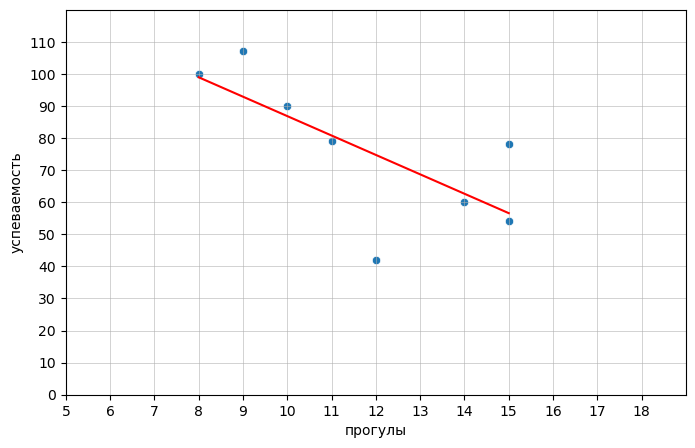

In [68]:
plt.figure(figsize=(8,5))

sns.scatterplot(x='X', y='Y', data=df)
sns.lineplot(x=df.X, y=y_pred, color ='r')

plt.xlim([5,19])
plt.xticks(ticks=np.arange(5, 19))
plt.ylim([0,120])
plt.yticks(ticks=np.arange(0, 120, 10))
plt.xlabel('прогулы')
plt.ylabel('успеваемость')
plt.grid(linewidth=0.4);

Уравнение регрессии аппроксимирует (приближает) эмпирические данные (точки), и с помощью него можно интерполировать (оценить) неизвестные промежуточные значения.

Очевидно, что чем ближе эмпирические точки к прямой, тем теснее линейная корреляционная зависимость – тем уравнение регрессии достовернее отражает ситуацию, и тем качественнее полученная модель. И наоборот, если многие точки разбросаны вдали от прямой, то признак $Y$ зависит от $X$ вовсе не линейно (если вообще зависит) и линейная функция плохо отражает реальную картину.

***
## <font color = DarkGreen size = 5> <b>Показатели влияния фактора на результат</b> </font>

***
### <font color = MediumBlue size = 4> <b>Линейный коэффициент корреляции</b> </font>

#### <font color = SteelBlue size = 3> <b>Выборочный линейный коэффициент парной корреляции Пирсона</b> </font>

**Коэффициентом корреляции** $r_{xy}$ случайных величин $X$ и $Y$ называют отношение корреляционного момента к произведению  
средних квадратических отклонений этих величин: \
$r_{xy} = \cfrac{\mu_{xy}}{\sigma_x \sigma_y}$, где 
$\mu_{xy} = M(XY) - M(X)M(Y)$ - [ковариация (корреляционный момент)](https://github.com/TanXmas/ProbabilityTheory_and_Statistics/blob/main/PT_04_System%20of%20two%20random%20variables.ipynb) $X$ и $Y$

***
**Коэффициент корреляции безразмерен и принимает значения из промежутка: $-1\leq r_{xy} \leq 1$.**

Чем ближе $r_{xy}$ *по модулю* к $1$, тем теснее линейная взаимосвязь между величинами $X$ и $Y$.

Чем ближе $r_{xy}$ *по модулю* к $0$ – тем такая зависимость выражена меньше.

Крайним значениям $r_{xy}=-1$ и $r_{xy}=1$ соответствует строгая функциональная зависимость $y = a + bx$

Для оценки тесноты связи можно использовать шкалу Чеддока:
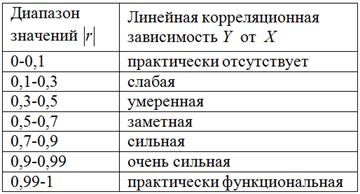

***
Если $r<0$, то корреляционная связь **обратная**, а если $r>0$, то **прямая**.

In [73]:
X = df['X'].values
Y = df['Y'].values

In [74]:
m = np.mean(X*Y) - np.mean(X) * np.mean(Y)
SDx = np.std(X)
SDy = np.std(Y)
r = m / (SDx * SDy)
r

-0.7193069877978744

In [75]:
np.corrcoef(X, Y)

array([[ 1.        , -0.71930699],
       [-0.71930699,  1.        ]])

***
### <font color = MediumBlue size = 4> <b>Коэффициент детерминации</b> </font>

**Коэффициент детерминации** – это частный аналог [эмпирического коэффициента детерминации](https://github.com/TanXmas/ProbabilityTheory_and_Statistics/blob/main/St_10_Grouping%20data.%20Combination%20grouping.ipynb) – квадрат коэффициента корреляции: \
$R^2 = r^2$

Коэффициент детерминации показывает долю вариации признака-результата $Y$, которая обусловлена воздействием признака-фактора $X$.

In [76]:
R = r**2
R

0.5174025426948514

В рамках построенной модели успеваемость на 51,74% зависит от количества прогулов. Оставшаяся часть вариации успеваемости (48,26%) обусловлена другими причинами.

***
### <font color = MediumBlue size = 4> <b>Коэффициент средней эластичности</b> </font>

**Эластичность** $Э$ – это количество процентов, на которое изменяется *признак-результат* при увеличении *признака-фактора* на $1\%$.

Если $|Э|<1$, то зависимый показатель **неэластичен** к воздействию признака-фактора.\
Если же $|Э|>1$ – то **эластичен**.

Функция эластичности имеет вид: \
$Э(x) = y'(x) \cdot \cfrac{x}{y(x)}$, где \
$y(x)$ – функция регрессии, \
$y'(x)$ – производная функции регрессии.

В подавляющем большинстве случаев эластичность зависит от значения $x$так, для линейной регрессии: \
$Э(x) = (a + bx)' \cdot \cfrac{x}{a+bx} = \cfrac{bx}{a+bx}$ – и  мы можем вычислить эластичность в любой точке $x$.

Но чаще рассчитывают **средний коэффициент эластичности**, по формуле: \
$\overline{Э} = b \cdot \cfrac{\overline{x}}{\overline{y}}$

In [78]:
el = b * Mx / My
el

-0.9320706668788796

При увеличении количества прогулов на 1% успеваемость уменьшается в среднем на 0,93%.

***
### <font color = MediumBlue size = 4> <b>Бета-коэффициент $\beta$</b> </font>

**Бета-коэффициент** – это количество средних квадратических отклонений, на которое меняется признак-результат $Y$ при увеличении признака-фактора $X$ на одно среднее квадратическое отклонение.

$\beta = b \cdot \cfrac{\sigma_x}{\sigma_y}$

Если какая-то причина сильно влияет на следствие, то $|\beta|>1$, часто в разы больше. \
Если влияние умеренное, то $|\beta|<1$. \
Близкие к нулю значения говорят о практической невосприимчивости к фактору.

In [81]:
beta = b * SDx / SDy
beta

-0.7193069877978744

При увеличении количества прогулов на одно стандартное отклонение успеваемость уменьшается примерно на 0,72 своего стандартного отклонения.